# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [4]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [5]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [6]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [8]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447646e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


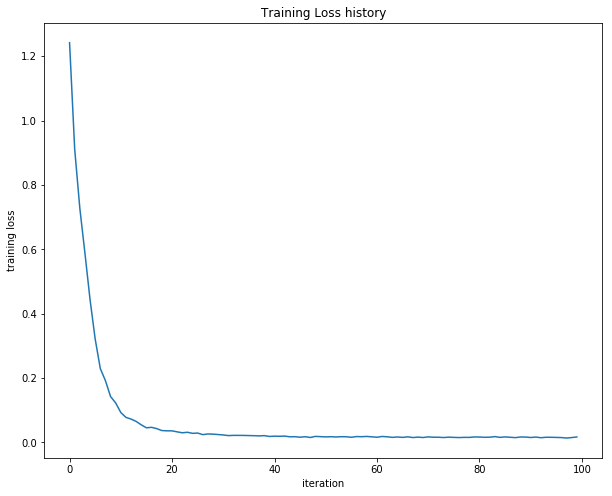

In [10]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [11]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [12]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302969
iteration 100 / 1000: loss 2.302562
iteration 200 / 1000: loss 2.299704
iteration 300 / 1000: loss 2.269940
iteration 400 / 1000: loss 2.175259
iteration 500 / 1000: loss 2.132866
iteration 600 / 1000: loss 2.069301
iteration 700 / 1000: loss 2.041945
iteration 800 / 1000: loss 1.935294
iteration 900 / 1000: loss 2.019246
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

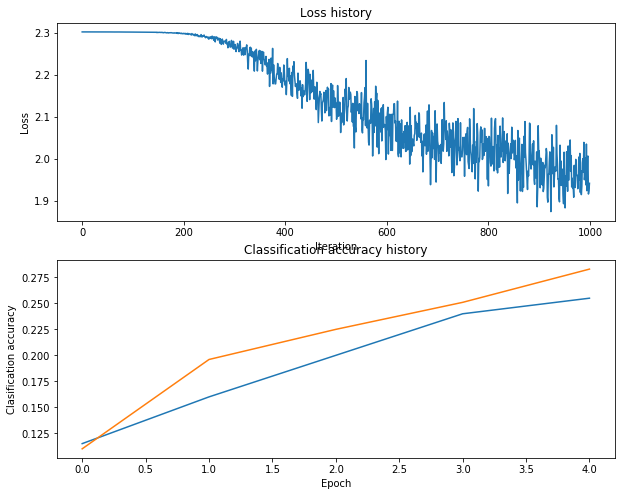

In [13]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

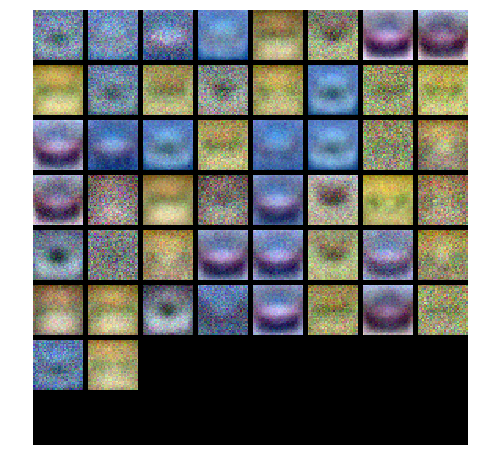

In [14]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

 hidden_size: 100, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303352
iteration 100 / 1000: loss 1.898561
iteration 200 / 1000: loss 1.766306
iteration 300 / 1000: loss 1.775235
iteration 400 / 1000: loss 1.614259
iteration 500 / 1000: loss 1.473084
iteration 600 / 1000: loss 1.570784
iteration 700 / 1000: loss 1.496199
iteration 800 / 1000: loss 1.518171
iteration 900 / 1000: loss 1.507602
Validation accuracy:  0.465


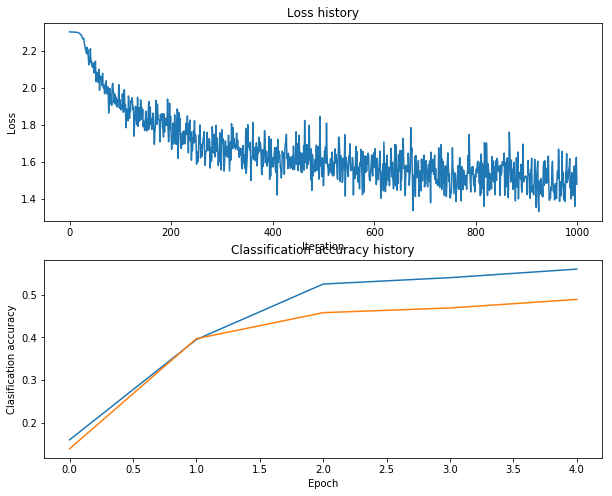

 hidden_size: 100, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303345
iteration 100 / 1000: loss 1.781731
iteration 200 / 1000: loss 1.663451
iteration 300 / 1000: loss 1.619449
iteration 400 / 1000: loss 1.535187
iteration 500 / 1000: loss 1.560568
iteration 600 / 1000: loss 1.585926
iteration 700 / 1000: loss 1.600174
iteration 800 / 1000: loss 1.514186
iteration 900 / 1000: loss 1.648399
Validation accuracy:  0.469


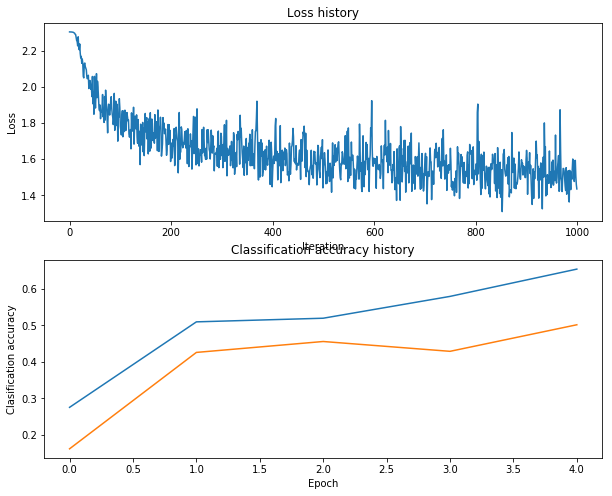

 hidden_size: 100, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303335
iteration 100 / 1000: loss 1.937830
iteration 200 / 1000: loss 1.736297
iteration 300 / 1000: loss 1.767300
iteration 400 / 1000: loss 1.669546
iteration 500 / 1000: loss 1.625208
iteration 600 / 1000: loss 1.629655
iteration 700 / 1000: loss 2.119992
iteration 800 / 1000: loss 1.785008
iteration 900 / 1000: loss 1.799074
Validation accuracy:  0.46


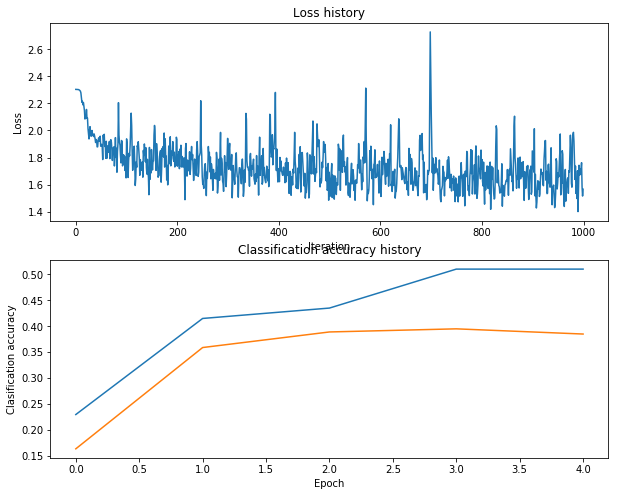

 hidden_size: 100, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303332
iteration 100 / 1000: loss 1.993802
iteration 200 / 1000: loss 1.854422
iteration 300 / 1000: loss 1.725815
iteration 400 / 1000: loss 1.537972
iteration 500 / 1000: loss 1.586730
iteration 600 / 1000: loss 1.576690
iteration 700 / 1000: loss 1.500026
iteration 800 / 1000: loss 1.485623
iteration 900 / 1000: loss 1.460145
Validation accuracy:  0.485


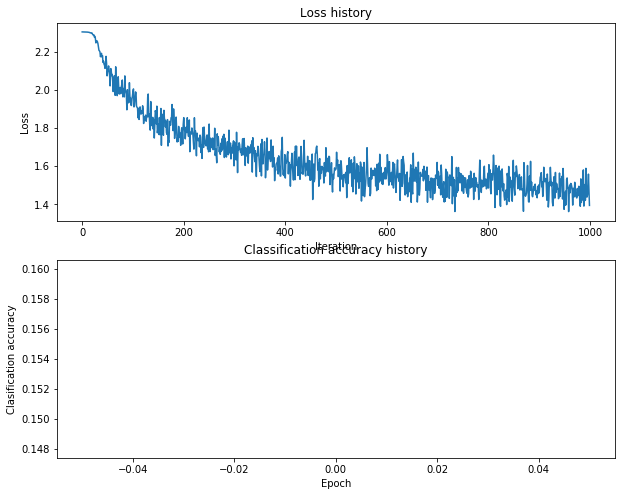

 hidden_size: 100, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303363
iteration 100 / 1000: loss 1.747050
iteration 200 / 1000: loss 1.783489
iteration 300 / 1000: loss 1.713595
iteration 400 / 1000: loss 1.588669
iteration 500 / 1000: loss 1.532221
iteration 600 / 1000: loss 1.390121
iteration 700 / 1000: loss 1.584738
iteration 800 / 1000: loss 1.548880
iteration 900 / 1000: loss 1.460358
Validation accuracy:  0.448


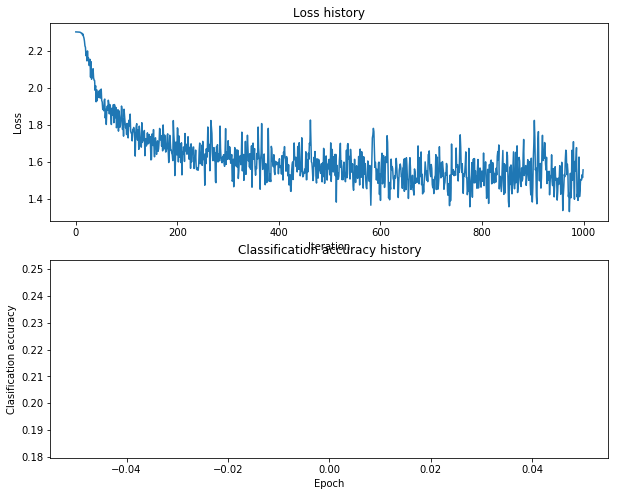

 hidden_size: 100, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303359
iteration 100 / 1000: loss 1.804941
iteration 200 / 1000: loss 1.669323
iteration 300 / 1000: loss 1.753922
iteration 400 / 1000: loss 1.668705
iteration 500 / 1000: loss 1.650381
iteration 600 / 1000: loss 1.633974
iteration 700 / 1000: loss 1.612283
iteration 800 / 1000: loss 1.859723
iteration 900 / 1000: loss 1.644051
Validation accuracy:  0.441


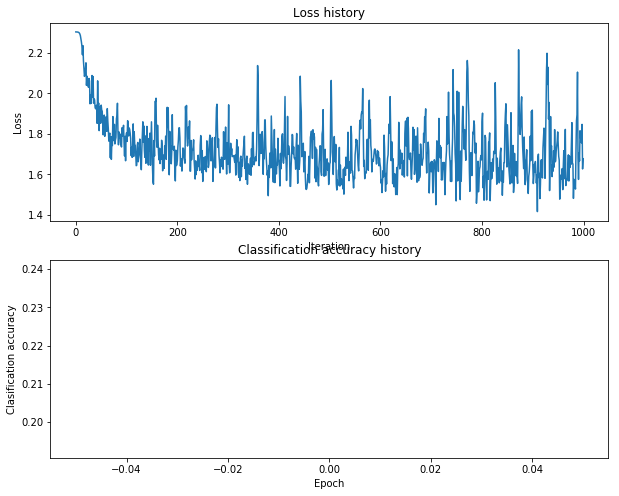

 hidden_size: 100, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303356
iteration 100 / 1000: loss 1.909916
iteration 200 / 1000: loss 1.747940
iteration 300 / 1000: loss 1.646510
iteration 400 / 1000: loss 1.603364
iteration 500 / 1000: loss 1.530646
iteration 600 / 1000: loss 1.566041
iteration 700 / 1000: loss 1.522909
iteration 800 / 1000: loss 1.485557
iteration 900 / 1000: loss 1.589118
Validation accuracy:  0.481


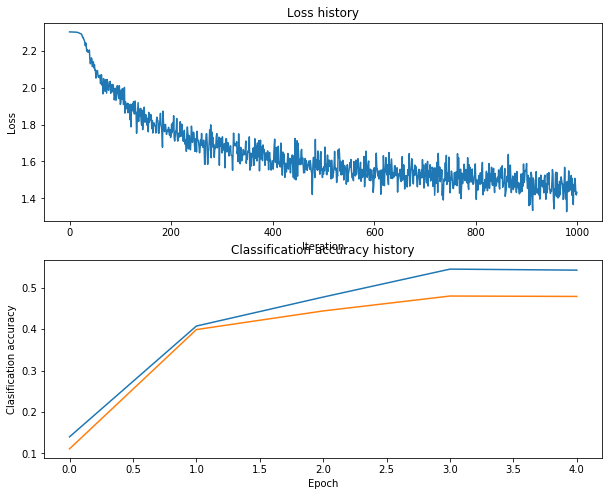

 hidden_size: 100, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303351
iteration 100 / 1000: loss 1.793594
iteration 200 / 1000: loss 1.630006
iteration 300 / 1000: loss 1.542292
iteration 400 / 1000: loss 1.540702
iteration 500 / 1000: loss 1.564380
iteration 600 / 1000: loss 1.455551
iteration 700 / 1000: loss 1.519146
iteration 800 / 1000: loss 1.600367
iteration 900 / 1000: loss 1.493830
Validation accuracy:  0.495


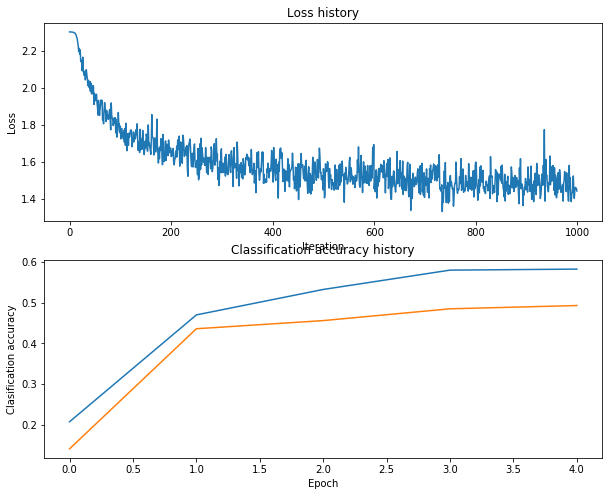

 hidden_size: 100, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303368
iteration 100 / 1000: loss 1.716779
iteration 200 / 1000: loss 1.762999
iteration 300 / 1000: loss 1.704052
iteration 400 / 1000: loss 1.664914
iteration 500 / 1000: loss 1.593058
iteration 600 / 1000: loss 1.703644
iteration 700 / 1000: loss 1.562498
iteration 800 / 1000: loss 1.643894
iteration 900 / 1000: loss 1.562699
Validation accuracy:  0.471


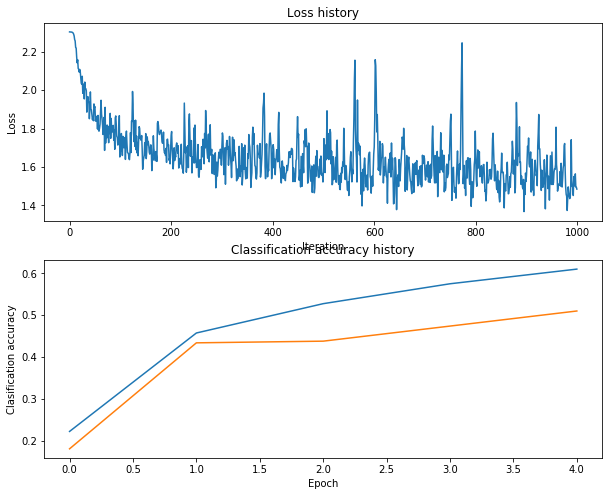

 hidden_size: 100, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303381
iteration 100 / 1000: loss 1.933800
iteration 200 / 1000: loss 1.829915
iteration 300 / 1000: loss 1.648767
iteration 400 / 1000: loss 1.592832
iteration 500 / 1000: loss 1.615596
iteration 600 / 1000: loss 1.627159
iteration 700 / 1000: loss 1.590952
iteration 800 / 1000: loss 1.513069
iteration 900 / 1000: loss 1.529126
Validation accuracy:  0.482


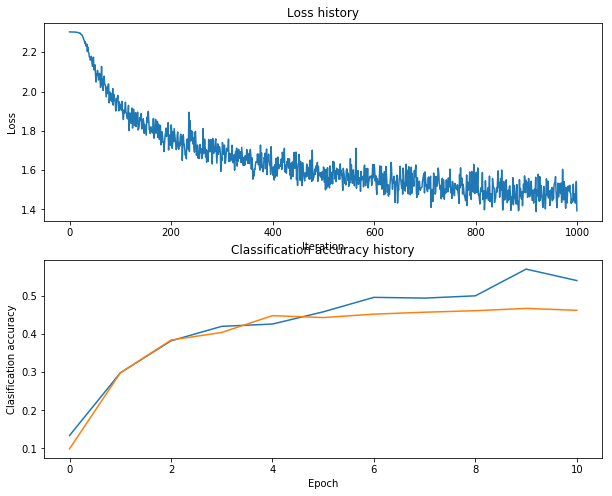

 hidden_size: 100, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303359
iteration 100 / 1000: loss 1.759868
iteration 200 / 1000: loss 1.619586
iteration 300 / 1000: loss 1.553914
iteration 400 / 1000: loss 1.545613
iteration 500 / 1000: loss 1.527539
iteration 600 / 1000: loss 1.495055
iteration 700 / 1000: loss 1.463299
iteration 800 / 1000: loss 1.509319
iteration 900 / 1000: loss 1.346925
Validation accuracy:  0.516


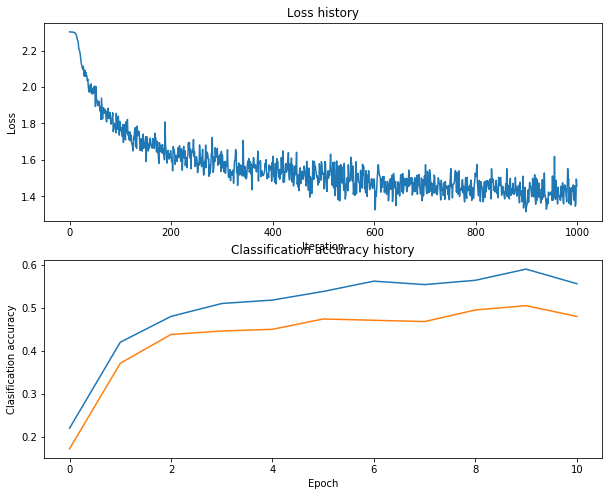

 hidden_size: 100, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303376
iteration 100 / 1000: loss 1.732067
iteration 200 / 1000: loss 1.640179
iteration 300 / 1000: loss 1.605875
iteration 400 / 1000: loss 1.521628
iteration 500 / 1000: loss 1.631013
iteration 600 / 1000: loss 1.521389
iteration 700 / 1000: loss 1.566196
iteration 800 / 1000: loss 1.505353
iteration 900 / 1000: loss 1.411733
Validation accuracy:  0.513


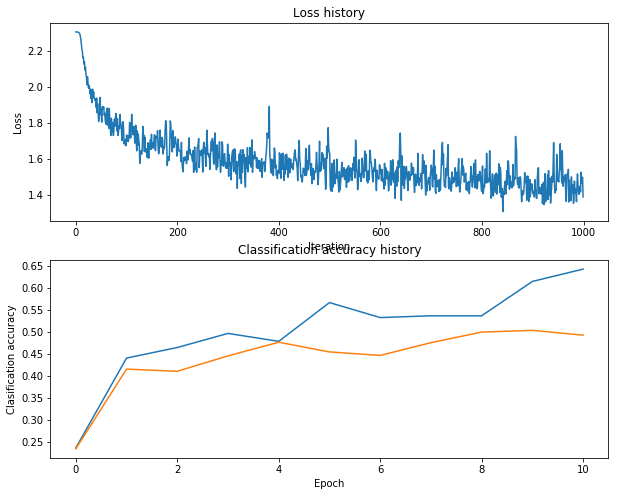

 hidden_size: 200, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304110
iteration 100 / 1000: loss 1.862670
iteration 200 / 1000: loss 1.752161
iteration 300 / 1000: loss 1.756940
iteration 400 / 1000: loss 1.560721
iteration 500 / 1000: loss 1.599157
iteration 600 / 1000: loss 1.561152
iteration 700 / 1000: loss 1.601208
iteration 800 / 1000: loss 1.572287
iteration 900 / 1000: loss 1.588270
Validation accuracy:  0.488


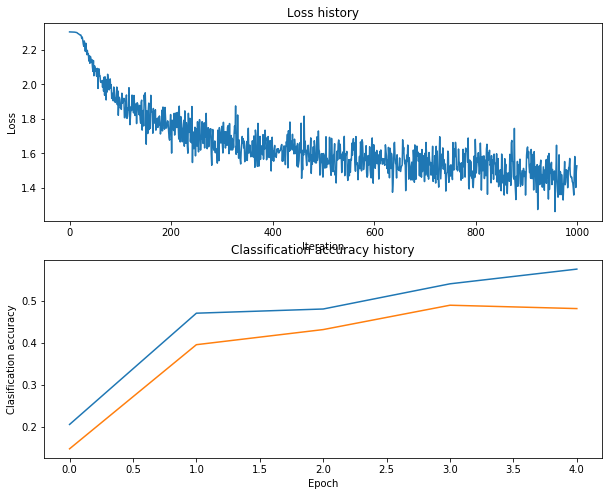

 hidden_size: 200, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304105
iteration 100 / 1000: loss 1.772464
iteration 200 / 1000: loss 1.657483
iteration 300 / 1000: loss 1.637149
iteration 400 / 1000: loss 1.656025
iteration 500 / 1000: loss 1.538579
iteration 600 / 1000: loss 1.463793
iteration 700 / 1000: loss 1.400654
iteration 800 / 1000: loss 1.454941
iteration 900 / 1000: loss 1.572364
Validation accuracy:  0.486


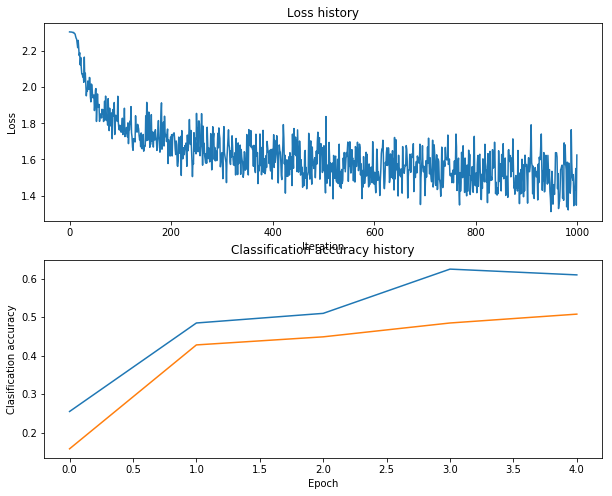

 hidden_size: 200, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304128
iteration 100 / 1000: loss 1.864847
iteration 200 / 1000: loss 1.665211
iteration 300 / 1000: loss 1.688888
iteration 400 / 1000: loss 1.686914
iteration 500 / 1000: loss 1.534184
iteration 600 / 1000: loss 1.877306
iteration 700 / 1000: loss 1.751712
iteration 800 / 1000: loss 1.578862
iteration 900 / 1000: loss 1.608588
Validation accuracy:  0.414


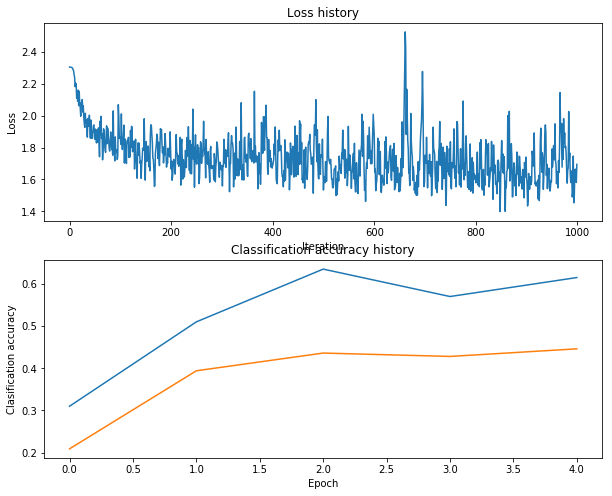

 hidden_size: 200, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304147
iteration 100 / 1000: loss 1.894536
iteration 200 / 1000: loss 1.765113
iteration 300 / 1000: loss 1.699391
iteration 400 / 1000: loss 1.640946
iteration 500 / 1000: loss 1.588342
iteration 600 / 1000: loss 1.508269
iteration 700 / 1000: loss 1.496622
iteration 800 / 1000: loss 1.557992
iteration 900 / 1000: loss 1.412406
Validation accuracy:  0.484


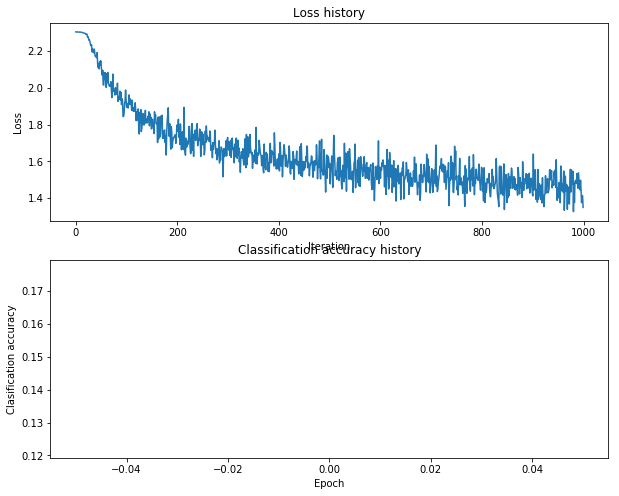

 hidden_size: 200, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304140
iteration 100 / 1000: loss 1.750493
iteration 200 / 1000: loss 1.614917
iteration 300 / 1000: loss 1.563872
iteration 400 / 1000: loss 1.721329
iteration 500 / 1000: loss 1.466160
iteration 600 / 1000: loss 1.728351
iteration 700 / 1000: loss 1.519143
iteration 800 / 1000: loss 1.548534
iteration 900 / 1000: loss 1.435646
Validation accuracy:  0.467


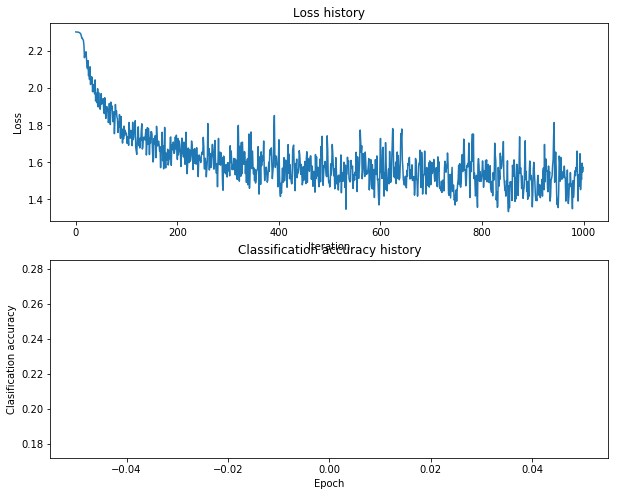

 hidden_size: 200, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304138
iteration 100 / 1000: loss 1.769643
iteration 200 / 1000: loss 1.616654
iteration 300 / 1000: loss 1.790983
iteration 400 / 1000: loss 1.756543
iteration 500 / 1000: loss 2.096819
iteration 600 / 1000: loss 1.852283
iteration 700 / 1000: loss 1.781935
iteration 800 / 1000: loss 1.872950
iteration 900 / 1000: loss 1.813012
Validation accuracy:  0.453


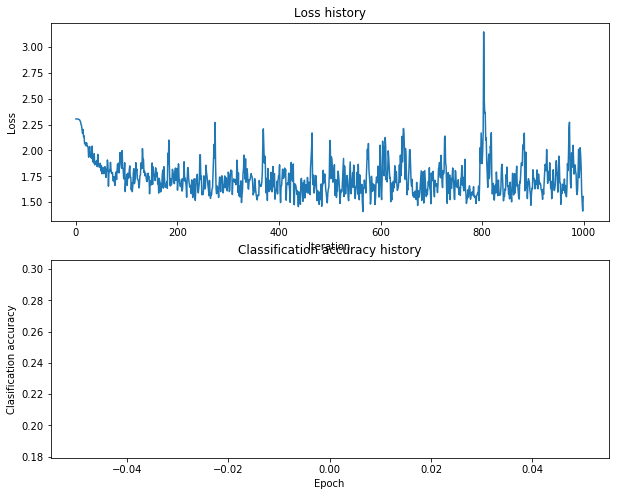

 hidden_size: 200, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304106
iteration 100 / 1000: loss 1.929644
iteration 200 / 1000: loss 1.739252
iteration 300 / 1000: loss 1.683492
iteration 400 / 1000: loss 1.627760
iteration 500 / 1000: loss 1.556678
iteration 600 / 1000: loss 1.461306
iteration 700 / 1000: loss 1.476263
iteration 800 / 1000: loss 1.576067
iteration 900 / 1000: loss 1.477489
Validation accuracy:  0.479


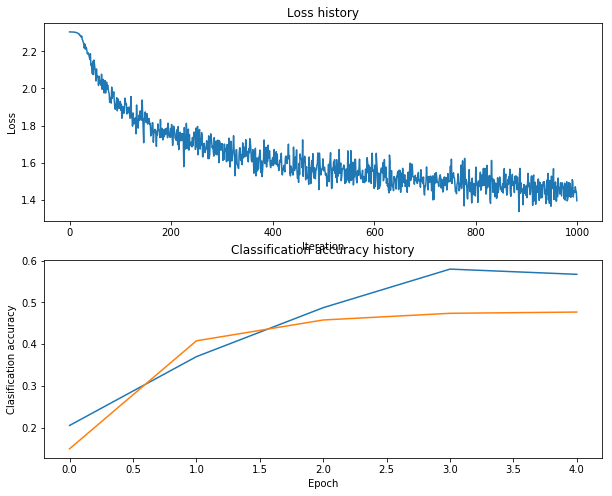

 hidden_size: 200, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304131
iteration 100 / 1000: loss 1.838327
iteration 200 / 1000: loss 1.652739
iteration 300 / 1000: loss 1.592294
iteration 400 / 1000: loss 1.586631
iteration 500 / 1000: loss 1.492124
iteration 600 / 1000: loss 1.507955
iteration 700 / 1000: loss 1.431461
iteration 800 / 1000: loss 1.422425
iteration 900 / 1000: loss 1.330676
Validation accuracy:  0.51


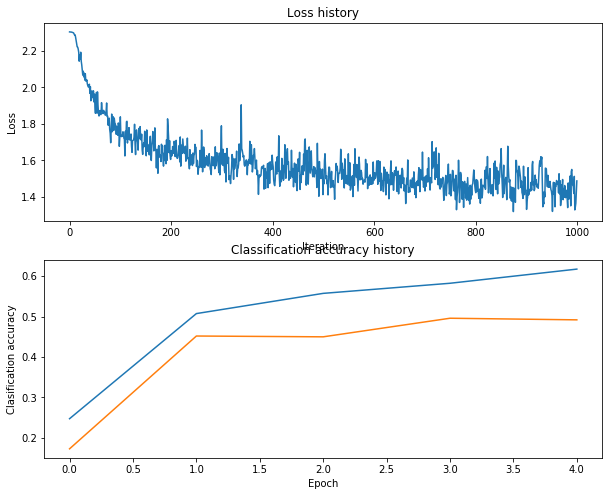

 hidden_size: 200, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304120
iteration 100 / 1000: loss 1.819286
iteration 200 / 1000: loss 1.774267
iteration 300 / 1000: loss 1.509299
iteration 400 / 1000: loss 1.492371
iteration 500 / 1000: loss 1.588499
iteration 600 / 1000: loss 1.606725
iteration 700 / 1000: loss 1.572601
iteration 800 / 1000: loss 1.561138
iteration 900 / 1000: loss 1.572971
Validation accuracy:  0.436


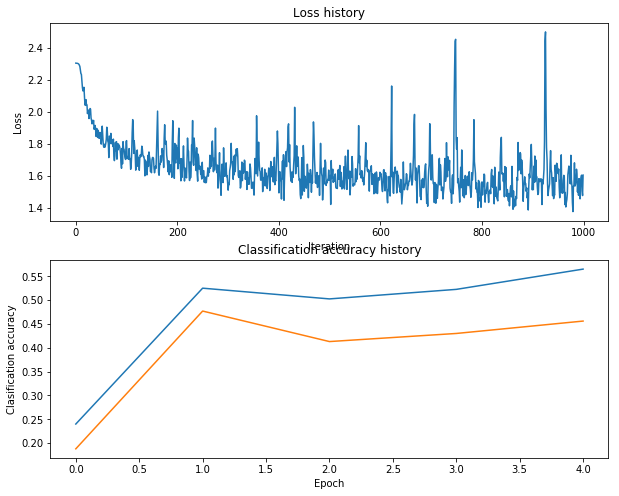

 hidden_size: 200, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304098
iteration 100 / 1000: loss 1.890659
iteration 200 / 1000: loss 1.782015
iteration 300 / 1000: loss 1.678320
iteration 400 / 1000: loss 1.646670
iteration 500 / 1000: loss 1.590761
iteration 600 / 1000: loss 1.502437
iteration 700 / 1000: loss 1.494975
iteration 800 / 1000: loss 1.564251
iteration 900 / 1000: loss 1.528731
Validation accuracy:  0.497


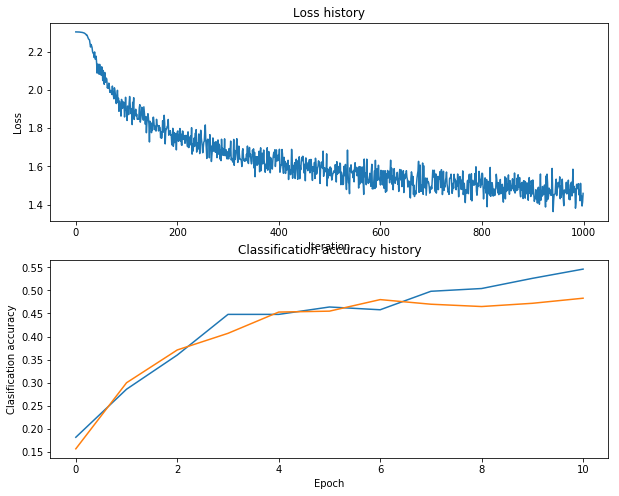

 hidden_size: 200, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304112
iteration 100 / 1000: loss 1.728295
iteration 200 / 1000: loss 1.641780
iteration 300 / 1000: loss 1.597873
iteration 400 / 1000: loss 1.578110
iteration 500 / 1000: loss 1.468758
iteration 600 / 1000: loss 1.458014
iteration 700 / 1000: loss 1.462728
iteration 800 / 1000: loss 1.374053
iteration 900 / 1000: loss 1.422045
Validation accuracy:  0.508


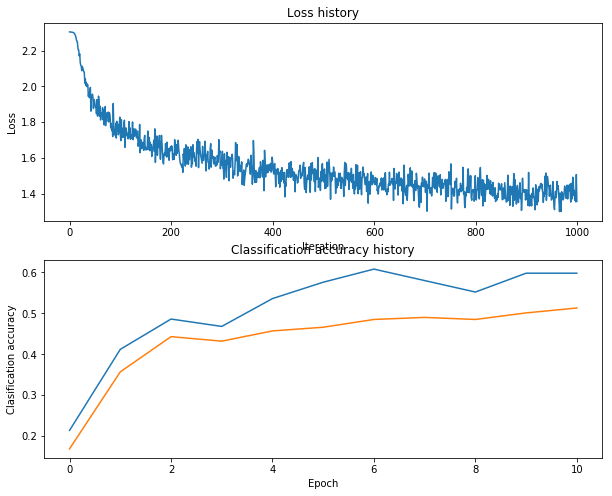

 hidden_size: 200, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304105
iteration 100 / 1000: loss 1.743401
iteration 200 / 1000: loss 1.585817
iteration 300 / 1000: loss 1.481718
iteration 400 / 1000: loss 1.506015
iteration 500 / 1000: loss 1.525325
iteration 600 / 1000: loss 1.453844
iteration 700 / 1000: loss 1.516536
iteration 800 / 1000: loss 1.456754
iteration 900 / 1000: loss 1.423310
Validation accuracy:  0.492


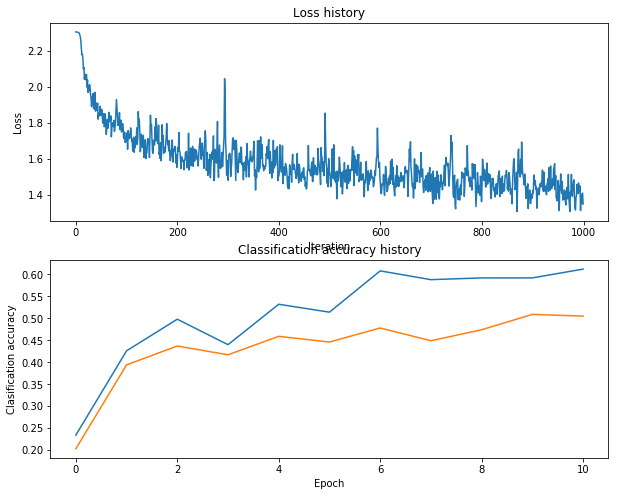

 hidden_size: 300, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304926
iteration 100 / 1000: loss 1.895607
iteration 200 / 1000: loss 1.812939
iteration 300 / 1000: loss 1.614889
iteration 400 / 1000: loss 1.760809
iteration 500 / 1000: loss 1.516903
iteration 600 / 1000: loss 1.465895
iteration 700 / 1000: loss 1.536299
iteration 800 / 1000: loss 1.485922
iteration 900 / 1000: loss 1.523989
Validation accuracy:  0.478


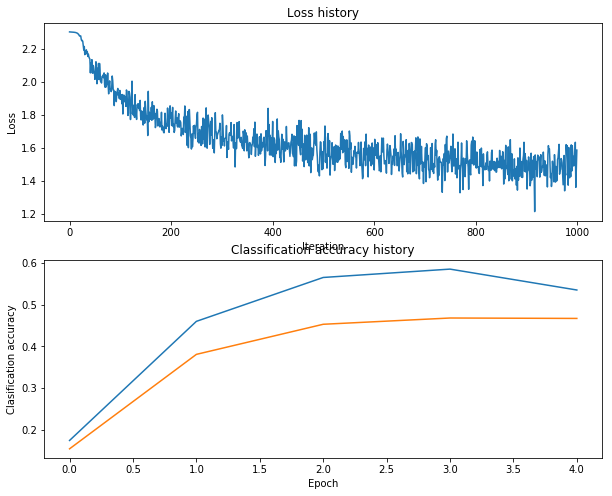

 hidden_size: 300, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304888
iteration 100 / 1000: loss 1.736523
iteration 200 / 1000: loss 1.623377
iteration 300 / 1000: loss 1.649992
iteration 400 / 1000: loss 1.604574
iteration 500 / 1000: loss 1.546584
iteration 600 / 1000: loss 1.677128
iteration 700 / 1000: loss 1.437168
iteration 800 / 1000: loss 1.554507
iteration 900 / 1000: loss 1.508445
Validation accuracy:  0.496


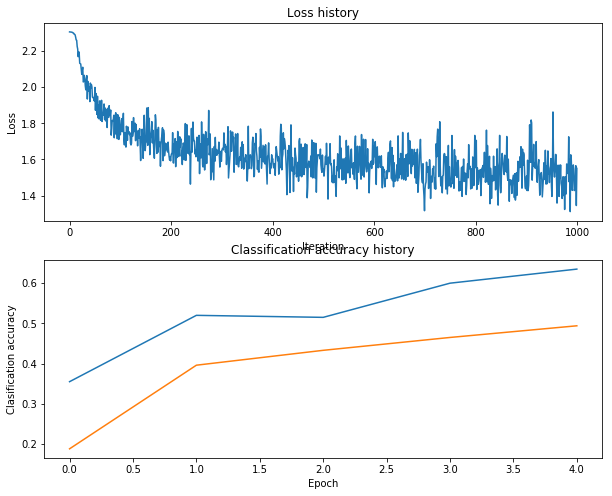

 hidden_size: 300, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304907
iteration 100 / 1000: loss 1.667002
iteration 200 / 1000: loss 1.949026
iteration 300 / 1000: loss 1.726665
iteration 400 / 1000: loss 1.783003
iteration 500 / 1000: loss 1.779810
iteration 600 / 1000: loss 1.682941
iteration 700 / 1000: loss 1.709952
iteration 800 / 1000: loss 1.741746
iteration 900 / 1000: loss 1.758052
Validation accuracy:  0.386


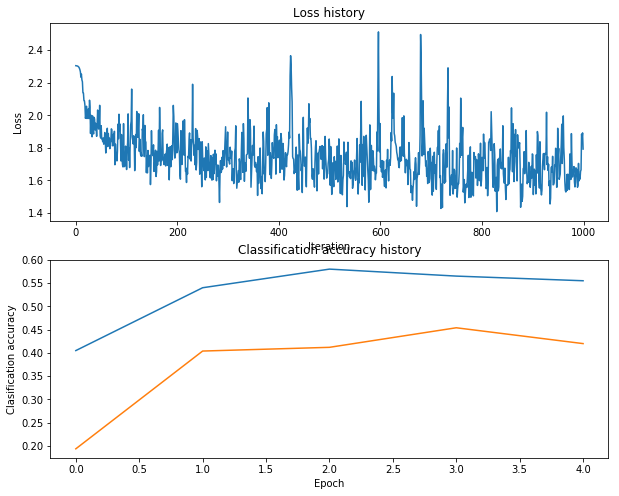

 hidden_size: 300, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304920
iteration 100 / 1000: loss 1.838439
iteration 200 / 1000: loss 1.698778
iteration 300 / 1000: loss 1.664381
iteration 400 / 1000: loss 1.681159
iteration 500 / 1000: loss 1.641313
iteration 600 / 1000: loss 1.561299
iteration 700 / 1000: loss 1.490748
iteration 800 / 1000: loss 1.492949
iteration 900 / 1000: loss 1.431208
Validation accuracy:  0.457


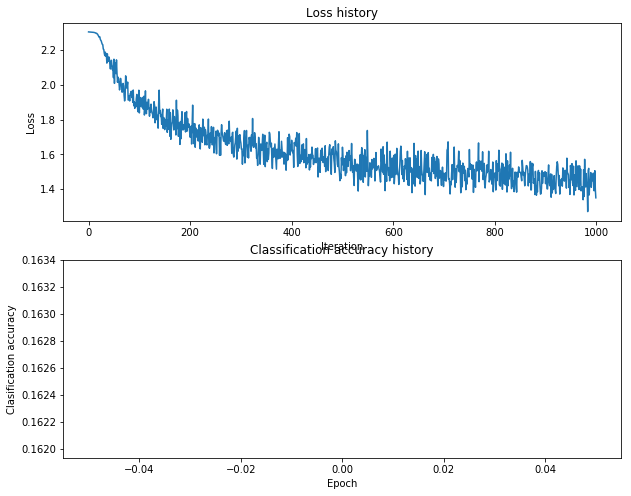

 hidden_size: 300, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304926
iteration 100 / 1000: loss 1.696292
iteration 200 / 1000: loss 1.612152
iteration 300 / 1000: loss 1.629853
iteration 400 / 1000: loss 1.586475
iteration 500 / 1000: loss 1.527108
iteration 600 / 1000: loss 1.585357
iteration 700 / 1000: loss 1.539193
iteration 800 / 1000: loss 1.565114
iteration 900 / 1000: loss 1.568773
Validation accuracy:  0.491


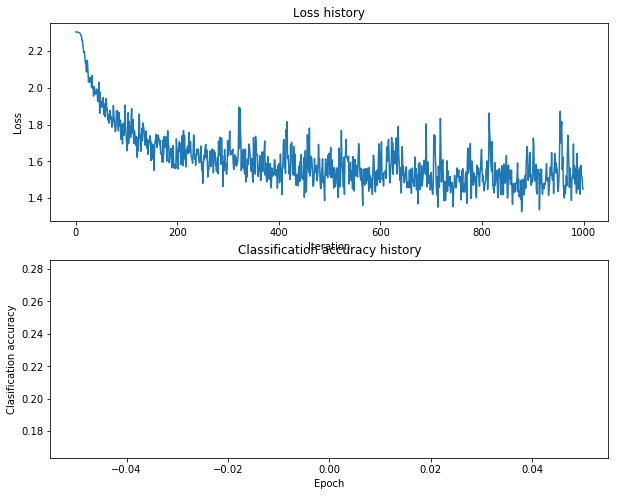

 hidden_size: 300, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304907
iteration 100 / 1000: loss 1.709750
iteration 200 / 1000: loss 1.703506
iteration 300 / 1000: loss 1.649078
iteration 400 / 1000: loss 1.753526
iteration 500 / 1000: loss 1.651371
iteration 600 / 1000: loss 1.860985
iteration 700 / 1000: loss 1.661177
iteration 800 / 1000: loss 1.569032
iteration 900 / 1000: loss 1.559983
Validation accuracy:  0.385


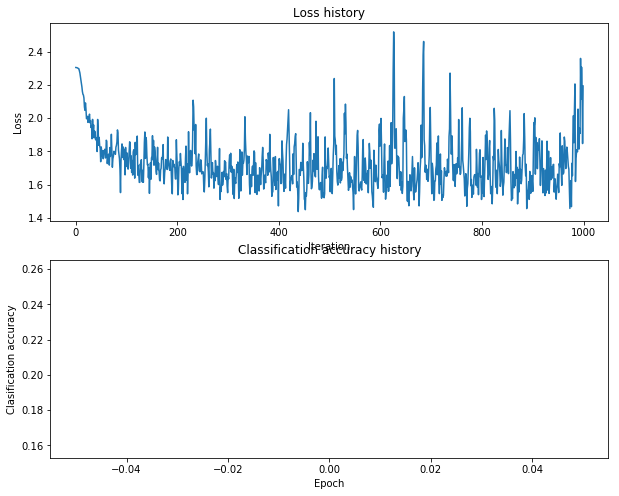

 hidden_size: 300, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304929
iteration 100 / 1000: loss 1.832452
iteration 200 / 1000: loss 1.732310
iteration 300 / 1000: loss 1.694536
iteration 400 / 1000: loss 1.589569
iteration 500 / 1000: loss 1.521625
iteration 600 / 1000: loss 1.463050
iteration 700 / 1000: loss 1.539803
iteration 800 / 1000: loss 1.399044
iteration 900 / 1000: loss 1.499256
Validation accuracy:  0.494


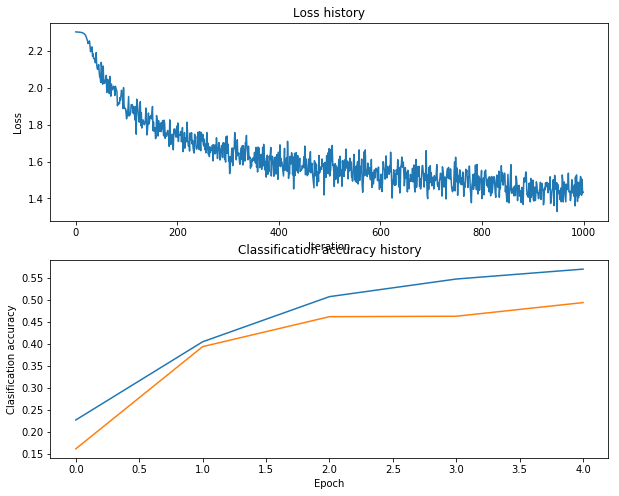

 hidden_size: 300, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304835
iteration 100 / 1000: loss 1.753672
iteration 200 / 1000: loss 1.604403
iteration 300 / 1000: loss 1.536904
iteration 400 / 1000: loss 1.516815
iteration 500 / 1000: loss 1.386613
iteration 600 / 1000: loss 1.466184
iteration 700 / 1000: loss 1.401376
iteration 800 / 1000: loss 1.467181
iteration 900 / 1000: loss 1.341595
Validation accuracy:  0.509


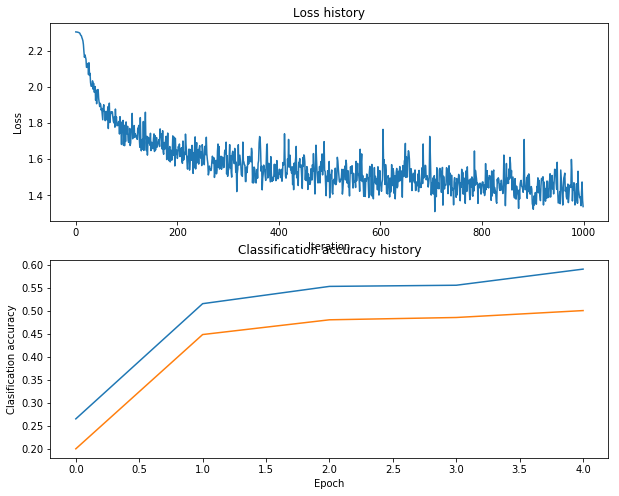

 hidden_size: 300, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304880
iteration 100 / 1000: loss 1.756851
iteration 200 / 1000: loss 1.669939
iteration 300 / 1000: loss 1.638240
iteration 400 / 1000: loss 1.530504
iteration 500 / 1000: loss 1.520535
iteration 600 / 1000: loss 1.759342
iteration 700 / 1000: loss 1.632640
iteration 800 / 1000: loss 1.607382
iteration 900 / 1000: loss 1.577705
Validation accuracy:  0.466


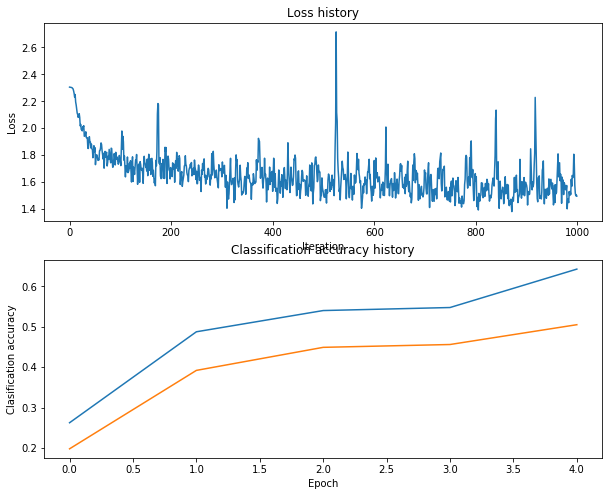

 hidden_size: 300, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304870
iteration 100 / 1000: loss 1.816899
iteration 200 / 1000: loss 1.734347
iteration 300 / 1000: loss 1.634769
iteration 400 / 1000: loss 1.558009
iteration 500 / 1000: loss 1.649408
iteration 600 / 1000: loss 1.539645
iteration 700 / 1000: loss 1.497936
iteration 800 / 1000: loss 1.481368
iteration 900 / 1000: loss 1.446950
Validation accuracy:  0.485


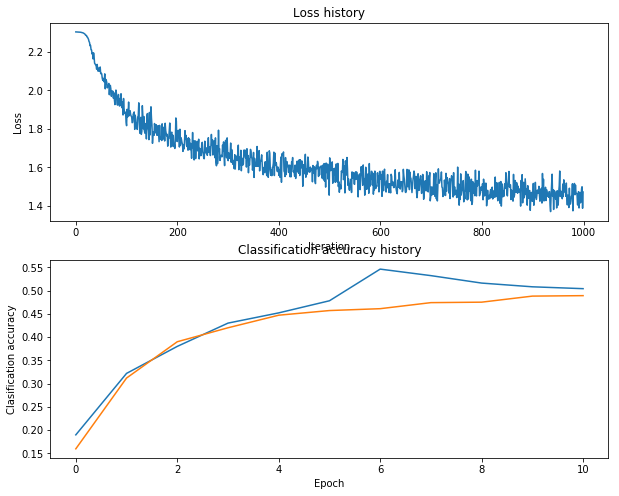

 hidden_size: 300, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304957
iteration 100 / 1000: loss 1.756055
iteration 200 / 1000: loss 1.660865
iteration 300 / 1000: loss 1.583390
iteration 400 / 1000: loss 1.548441
iteration 500 / 1000: loss 1.500225
iteration 600 / 1000: loss 1.444856
iteration 700 / 1000: loss 1.522235
iteration 800 / 1000: loss 1.426345
iteration 900 / 1000: loss 1.385147
Validation accuracy:  0.522


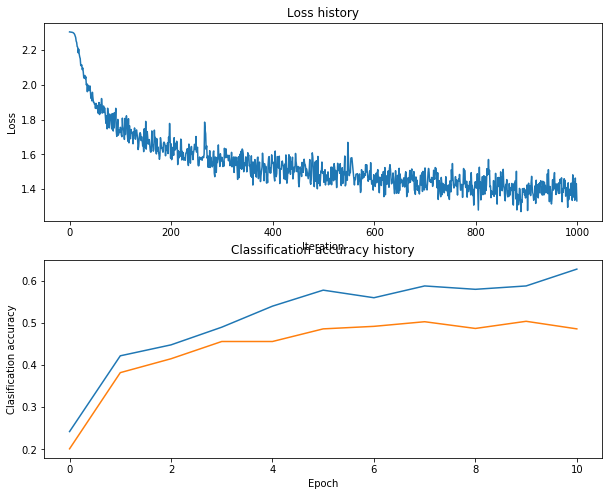

 hidden_size: 300, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304957
iteration 100 / 1000: loss 1.698036
iteration 200 / 1000: loss 1.598491
iteration 300 / 1000: loss 1.467527
iteration 400 / 1000: loss 1.536436
iteration 500 / 1000: loss 1.402295
iteration 600 / 1000: loss 1.404472
iteration 700 / 1000: loss 1.474116
iteration 800 / 1000: loss 1.454329
iteration 900 / 1000: loss 1.458342
Validation accuracy:  0.511


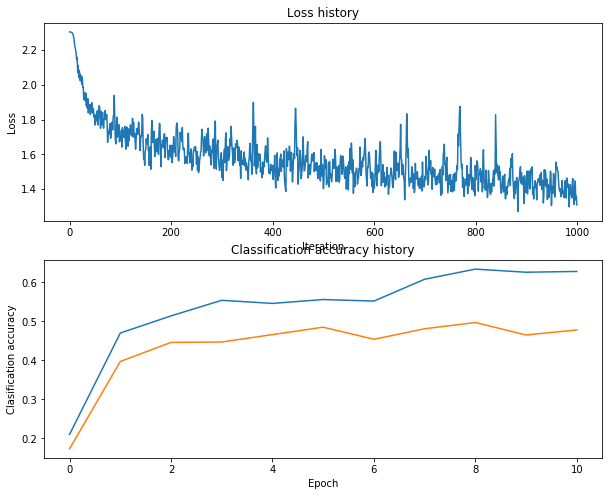

 hidden_size: 400, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305745
iteration 100 / 1000: loss 1.859189
iteration 200 / 1000: loss 1.765088
iteration 300 / 1000: loss 1.683398
iteration 400 / 1000: loss 1.536684
iteration 500 / 1000: loss 1.691777
iteration 600 / 1000: loss 1.574743
iteration 700 / 1000: loss 1.523372
iteration 800 / 1000: loss 1.646535
iteration 900 / 1000: loss 1.684584
Validation accuracy:  0.484


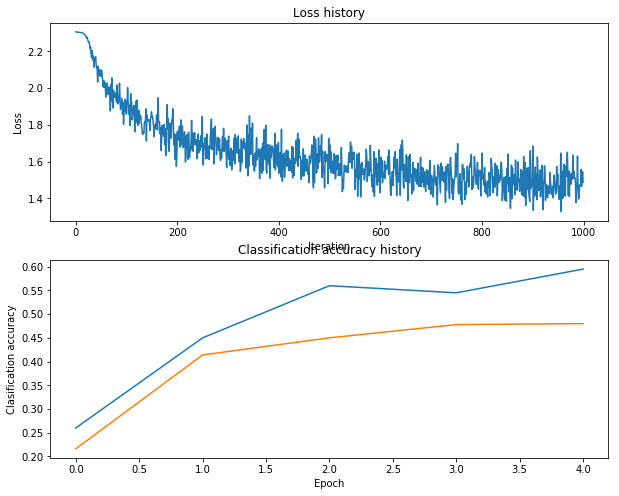

 hidden_size: 400, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305656
iteration 100 / 1000: loss 1.775042
iteration 200 / 1000: loss 1.668155
iteration 300 / 1000: loss 1.665269
iteration 400 / 1000: loss 1.578001
iteration 500 / 1000: loss 1.560203
iteration 600 / 1000: loss 1.624527
iteration 700 / 1000: loss 1.554371
iteration 800 / 1000: loss 1.436935
iteration 900 / 1000: loss 1.459424
Validation accuracy:  0.477


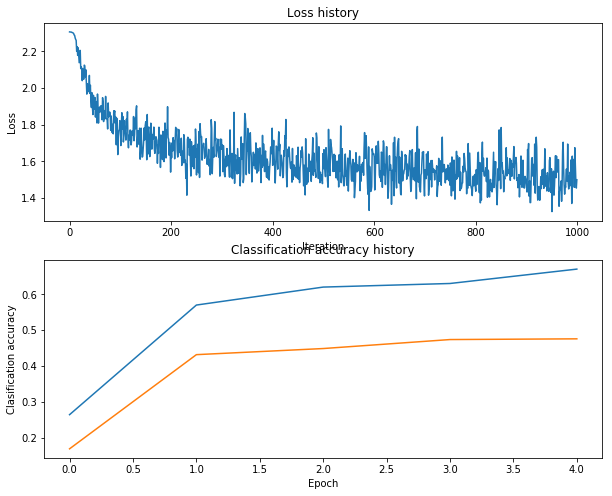

 hidden_size: 400, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305699
iteration 100 / 1000: loss 1.826749
iteration 200 / 1000: loss 1.826988
iteration 300 / 1000: loss 1.561553
iteration 400 / 1000: loss 1.649067
iteration 500 / 1000: loss 1.787080
iteration 600 / 1000: loss 1.675494
iteration 700 / 1000: loss 1.594610
iteration 800 / 1000: loss 1.700831
iteration 900 / 1000: loss 1.624611
Validation accuracy:  0.428


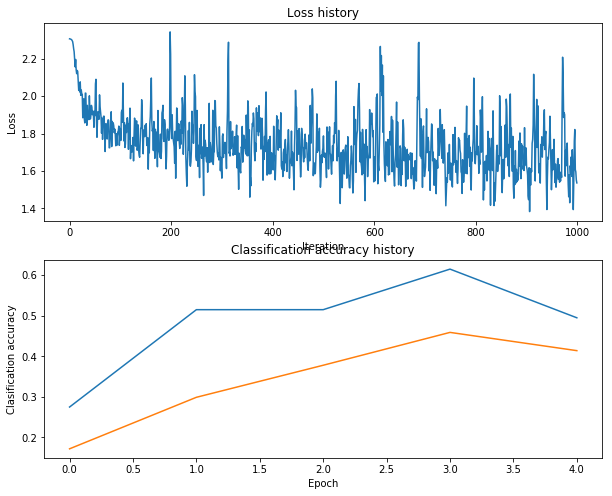

 hidden_size: 400, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305630
iteration 100 / 1000: loss 1.923682
iteration 200 / 1000: loss 1.752434
iteration 300 / 1000: loss 1.674388
iteration 400 / 1000: loss 1.495416
iteration 500 / 1000: loss 1.692876
iteration 600 / 1000: loss 1.563934
iteration 700 / 1000: loss 1.530812
iteration 800 / 1000: loss 1.432751
iteration 900 / 1000: loss 1.583229
Validation accuracy:  0.497


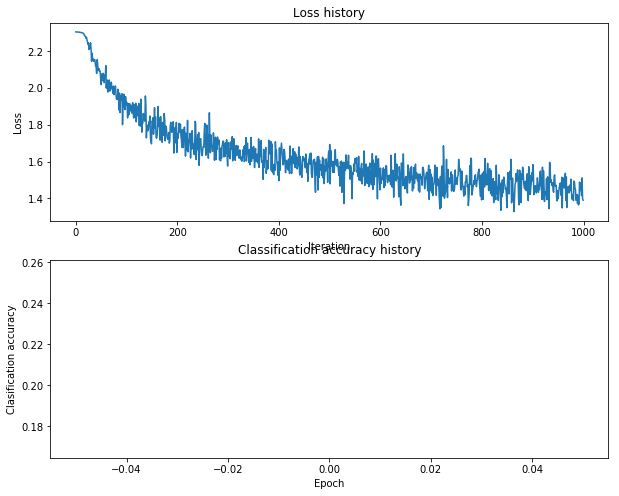

 hidden_size: 400, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305707
iteration 100 / 1000: loss 1.725967
iteration 200 / 1000: loss 1.637915
iteration 300 / 1000: loss 1.617779
iteration 400 / 1000: loss 1.521018
iteration 500 / 1000: loss 1.532595
iteration 600 / 1000: loss 1.562419
iteration 700 / 1000: loss 1.544125
iteration 800 / 1000: loss 1.741939
iteration 900 / 1000: loss 1.600609
Validation accuracy:  0.484


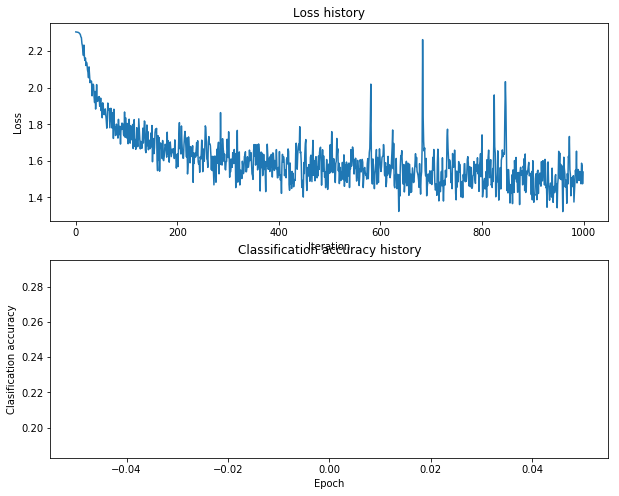

 hidden_size: 400, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305657
iteration 100 / 1000: loss 1.858941
iteration 200 / 1000: loss 1.722011
iteration 300 / 1000: loss 1.758804
iteration 400 / 1000: loss 1.493138
iteration 500 / 1000: loss 1.619820
iteration 600 / 1000: loss 1.633649
iteration 700 / 1000: loss 2.614347
iteration 800 / 1000: loss 1.534903
iteration 900 / 1000: loss 1.645756
Validation accuracy:  0.481


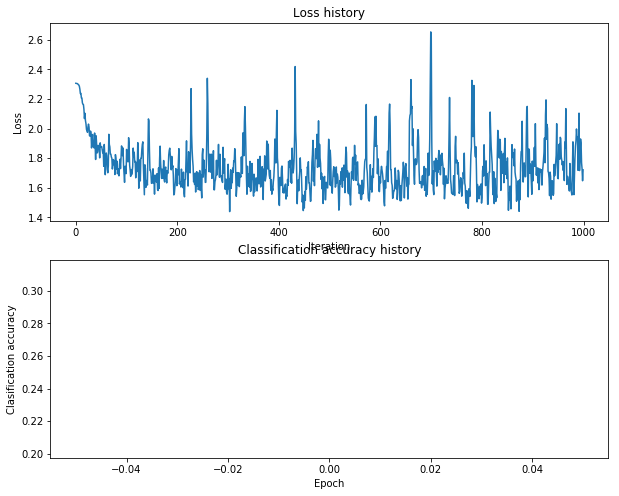

 hidden_size: 400, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305675
iteration 100 / 1000: loss 1.865876
iteration 200 / 1000: loss 1.717564
iteration 300 / 1000: loss 1.751428
iteration 400 / 1000: loss 1.711338
iteration 500 / 1000: loss 1.640698
iteration 600 / 1000: loss 1.555005
iteration 700 / 1000: loss 1.559963
iteration 800 / 1000: loss 1.514712
iteration 900 / 1000: loss 1.430295
Validation accuracy:  0.492


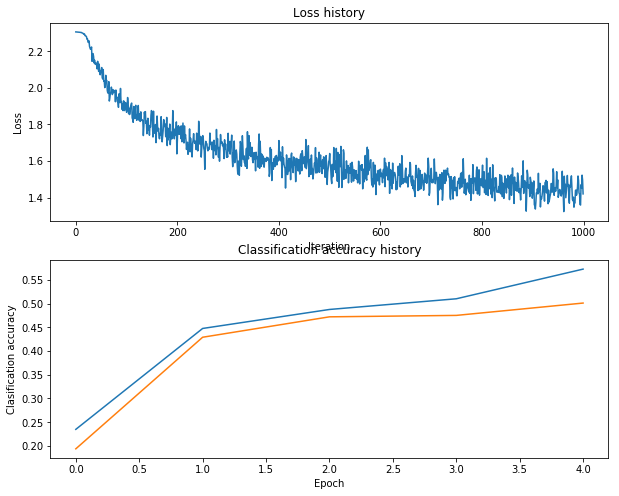

 hidden_size: 400, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305633
iteration 100 / 1000: loss 1.668811
iteration 200 / 1000: loss 1.583415
iteration 300 / 1000: loss 1.629046
iteration 400 / 1000: loss 1.567848
iteration 500 / 1000: loss 1.474979
iteration 600 / 1000: loss 1.461114
iteration 700 / 1000: loss 1.457490
iteration 800 / 1000: loss 1.430933
iteration 900 / 1000: loss 1.446034
Validation accuracy:  0.523


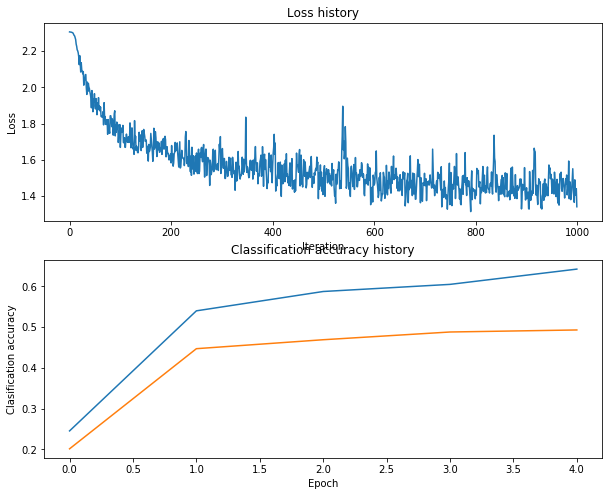

 hidden_size: 400, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305615
iteration 100 / 1000: loss 1.818400
iteration 200 / 1000: loss 1.680121
iteration 300 / 1000: loss 1.778069
iteration 400 / 1000: loss 1.569743
iteration 500 / 1000: loss 1.471560
iteration 600 / 1000: loss 1.662233
iteration 700 / 1000: loss 1.506455
iteration 800 / 1000: loss 1.515566
iteration 900 / 1000: loss 1.535698
Validation accuracy:  0.442


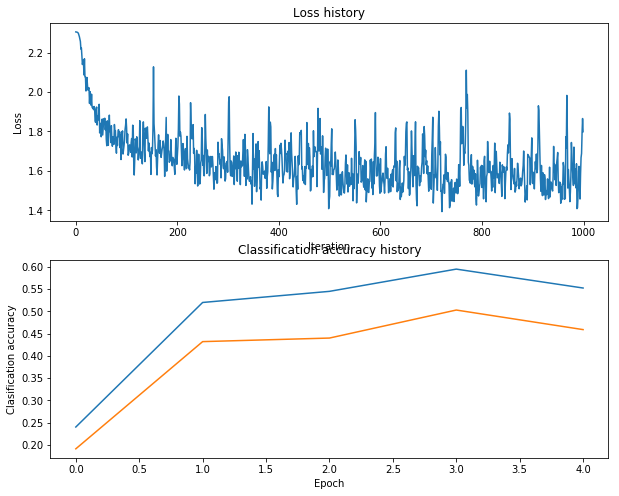

 hidden_size: 400, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305635
iteration 100 / 1000: loss 1.917281
iteration 200 / 1000: loss 1.764218
iteration 300 / 1000: loss 1.665718
iteration 400 / 1000: loss 1.582156
iteration 500 / 1000: loss 1.556792
iteration 600 / 1000: loss 1.525722
iteration 700 / 1000: loss 1.476064
iteration 800 / 1000: loss 1.439686
iteration 900 / 1000: loss 1.488210
Validation accuracy:  0.49


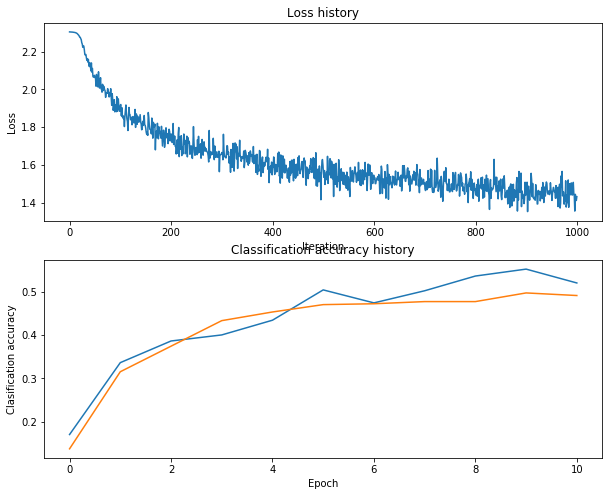

 hidden_size: 400, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305614
iteration 100 / 1000: loss 1.755069
iteration 200 / 1000: loss 1.610762
iteration 300 / 1000: loss 1.611876
iteration 400 / 1000: loss 1.532397
iteration 500 / 1000: loss 1.405674
iteration 600 / 1000: loss 1.465611
iteration 700 / 1000: loss 1.376456
iteration 800 / 1000: loss 1.453303
iteration 900 / 1000: loss 1.392764
Validation accuracy:  0.507


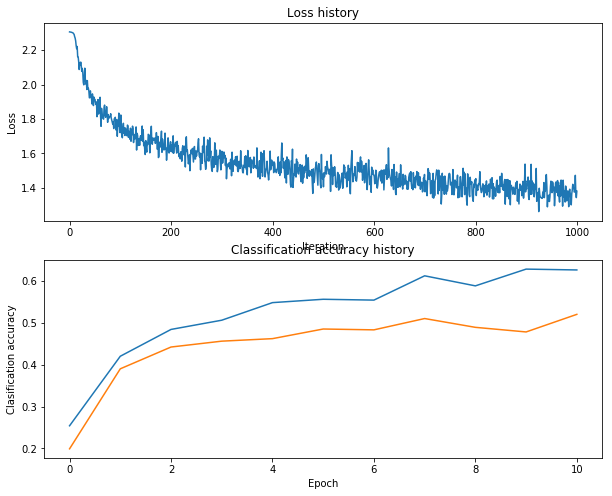

 hidden_size: 400, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305741
iteration 100 / 1000: loss 1.687030
iteration 200 / 1000: loss 1.696186
iteration 300 / 1000: loss 1.510951
iteration 400 / 1000: loss 1.557024
iteration 500 / 1000: loss 1.551029
iteration 600 / 1000: loss 1.553930
iteration 700 / 1000: loss 1.384400
iteration 800 / 1000: loss 1.511346
iteration 900 / 1000: loss 1.376964
Validation accuracy:  0.474


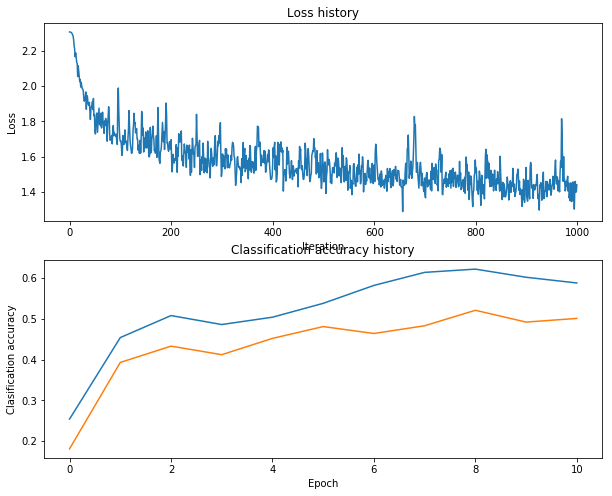

In [42]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters u-sing the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have   qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_sizes = [100, 200, 300, 400]
num_classes = 10
learning_rates = [1e-3, 2*1e-3, 3*1e-3]
regularization_strengths = [0.25]
batch_sizes = [200, 300, 400, 500]
best_val = -1

for hidden_size in hidden_sizes:
    for batch_size in batch_sizes:
        for lr in learning_rates:
            for reg in regularization_strengths:
                print(" hidden_size: %d, batch_size: %d, lr: %f, reg: %f"%(hidden_size, batch_size, lr, reg))
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1000, batch_size=batch_size,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                if val_acc > best_val:
                    best_net = net
                    best_val = val_acc
                
                plt.subplot(2, 1, 1)
                plt.plot(stats['loss_history'])
                plt.title('Loss history')
                plt.xlabel('Iteration')
                plt.ylabel('Loss')

                plt.subplot(2, 1, 2)
                plt.plot(stats['train_acc_history'], label='train')
                plt.plot(stats['val_acc_history'], label='val')
                plt.title('Classification accuracy history')
                plt.xlabel('Epoch')
                plt.ylabel('Clasification accuracy')
                plt.show()
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

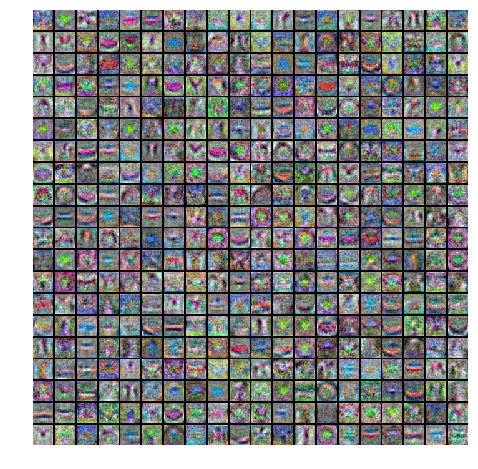

In [43]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [44]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.515
